In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [9]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


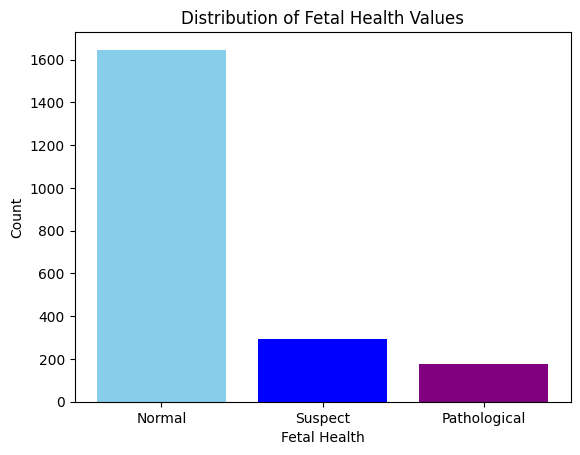

In [13]:
# prompt: génère moi un diagramme en barre pour voir la répartition des valeurs de la colonne fetal_health avec les labels suivants; 1 pour Normal, 2 pour Suspect et 3 pour Pathological, propose des couleurs différentes pour chaque valeur
fetal_health_counts = data['fetal_health'].value_counts()

labels = ['Normal', 'Suspect', 'Pathological']
colors = ['skyblue', 'blue', 'purple']

plt.bar(labels, fetal_health_counts, color=colors)
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.title('Distribution of Fetal Health Values')
plt.show()

In [14]:
#Affichage des valeurs de la colonne "Congestion_Type"
print('Class distribution')
df["fetal_health"].value_counts()

Class distribution


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

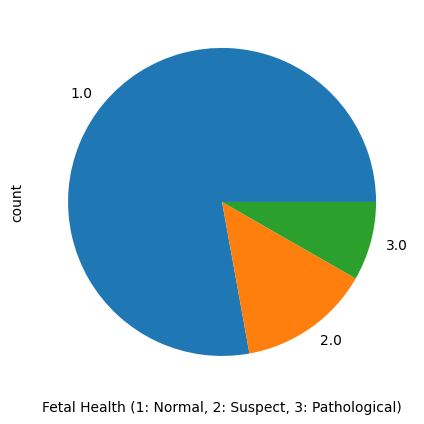

In [16]:
plt.figure(figsize=(5,5))
df["fetal_health"].value_counts().plot.pie()
plt.xlabel('Fetal Health (1: Normal, 2: Suspect, 3: Pathological)')
plt.savefig('class.png')

LES DEUX CELLULES PRECEDENTES PERMETTENT D'AFFICHER LES PROPORTIONS DES ENREGISTREMENTS DES DIFFERENTES CLASSES DE NOTRE DATASET. ON DENOMBRE 4 CLASSES DANS NOTRE DATASET, DONC NOUS TRAVAILLONS SUR UN PROBLEME DE CLASSIFICATION MULTICLASSE. Le dataset n'est pas equilibre en terme du nombre d'enregistrements par classe. Classons les differentes classes par ordre croissant du nombre d'enregistrement contenues dans le dataset:
* 1 Normal: 1655 enregistrements
* 2 Suspect: 295 enregistrements
* 3 Pathologique: 176 enregistrements

In [17]:
corr = df.corr()
corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [18]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

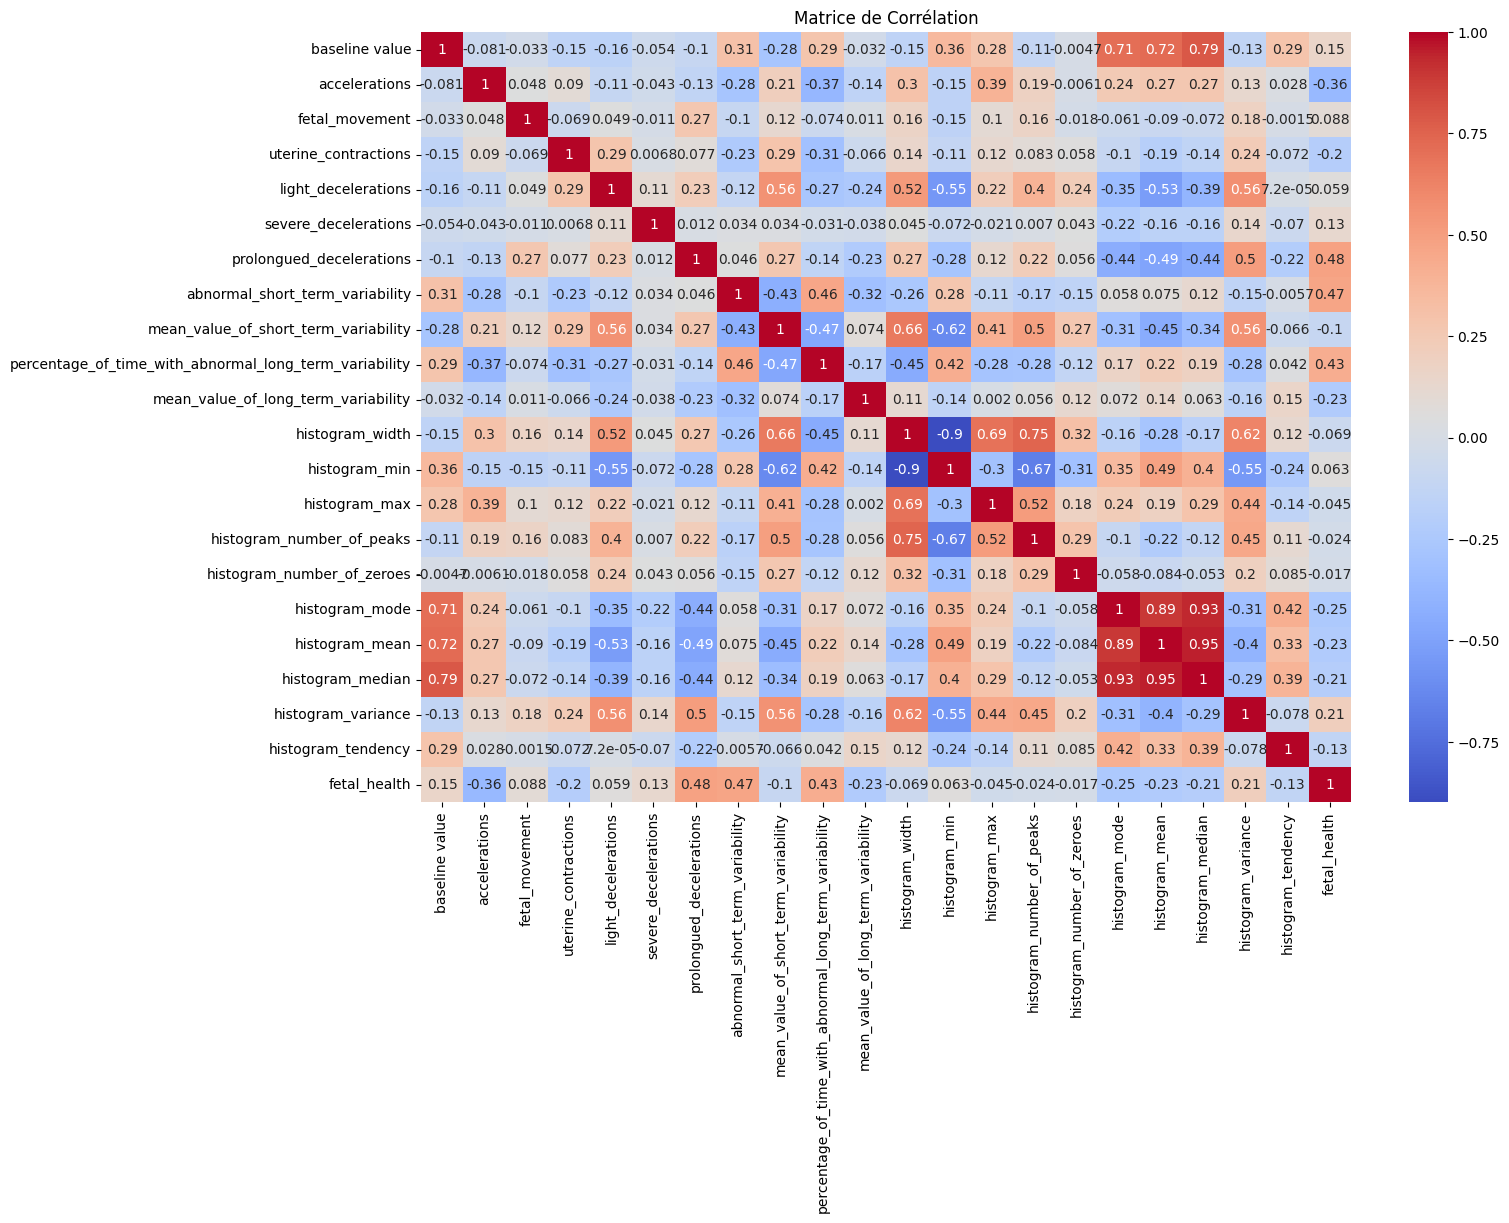

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [19]:
# Visualiser la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Corrélation avec la variable cible (fetal_health)
corr_target = corr['fetal_health'].sort_values(ascending=False)
print(corr_target)

Nous remarquons plusieurs paramètres très faiblement correlés avec notre cible. Nous allons éliminer les colonnes suivantes:
* histogram_number_of_zeroes                               -0.016682
* histogram_number_of_peaks                                -0.023666
* histogram_max                                            -0.045265
* histogram_width                                          -0.068789
* mean_value_of_short_term_variability                     -0.103382
* histogram_tendency                                       -0.131976


In [23]:
corr= df.corr()
corr_y = abs(corr['fetal_health'])
lowest_corr = corr_y[corr_y < -0.131976]
lowest_corr.sort_values(ascending=True)

Series([], Name: fetal_health, dtype: float64)

In [24]:
deleted_columns = ["histogram_number_of_zeroes", "histogram_number_of_peaks","histogram_max","histogram_width","mean_value_of_short_term_variability","histogram_tendency"]
df.drop(deleted_columns, axis = 1, inplace = True)

In [25]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,43.0,2.4,62.0,120.0,137.0,121.0,73.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,0.0,10.4,68.0,141.0,136.0,140.0,12.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,13.4,68.0,141.0,135.0,138.0,13.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,23.0,53.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,0.0,19.9,53.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,25.0,7.2,137.0,153.0,150.0,152.0,2.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,22.0,7.1,103.0,152.0,148.0,151.0,3.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,20.0,6.1,103.0,153.0,148.0,152.0,4.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,27.0,7.0,103.0,152.0,147.0,151.0,4.0,2.0


In [26]:
#Si on a pas au prealable une variable contenant les variables d'entrees du dataset on procede comme suit
Y = np.array(df['fetal_health'])
X= np.array(df.loc[:, df.columns != 'fetal_health'])

In [28]:
import sklearn.model_selection
#Diviser le jeu de donnees en jeu de donnees de d'entrainement(x_train, y_train) et en jeu de donnees de test(x_test, y_test)
#grace au variable globale X et Y.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2, random_state=5, stratify=Y)

In [29]:
#Enregistrer les nouveaux jeu de donnees train et test crees dans des fichiers .txt

np.savetxt("xtrain.txt", x_train)
np.savetxt("xtest.txt", x_test)
np.savetxt("ytrain.txt", y_train)
np.savetxt("ytest.txt", y_test)

In [30]:
x_train, y_train, x_test, y_test

(array([[1.40e+02, 3.00e-03, 1.00e-03, ..., 1.37e+02, 1.42e+02, 1.80e+01],
        [1.44e+02, 1.00e-03, 0.00e+00, ..., 1.57e+02, 1.60e+02, 5.00e+00],
        [1.32e+02, 0.00e+00, 0.00e+00, ..., 1.28e+02, 1.32e+02, 1.20e+01],
        ...,
        [1.40e+02, 7.00e-03, 0.00e+00, ..., 1.53e+02, 1.55e+02, 5.00e+00],
        [1.25e+02, 2.00e-03, 1.40e-02, ..., 1.15e+02, 1.21e+02, 7.20e+01],
        [1.51e+02, 0.00e+00, 0.00e+00, ..., 1.48e+02, 1.55e+02, 4.20e+01]]),
 array([1., 2., 1., ..., 1., 1., 2.]),
 array([[1.46e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 1.56e+02, 1.70e+01],
        [1.22e+02, 6.00e-03, 0.00e+00, ..., 1.29e+02, 1.30e+02, 4.00e+00],
        [1.33e+02, 5.00e-03, 0.00e+00, ..., 1.35e+02, 1.40e+02, 2.10e+01],
        ...,
        [1.41e+02, 9.00e-03, 2.30e-02, ..., 1.49e+02, 1.52e+02, 8.00e+00],
        [1.29e+02, 1.50e-02, 0.00e+00, ..., 1.43e+02, 1.44e+02, 9.00e+00],
        [1.22e+02, 4.00e-03, 0.00e+00, ..., 1.23e+02, 1.24e+02, 5.00e+00]]),
 array([1., 1., 1., 1., 1., 3.,

Nous sommes a present a la phase d'entrainement du modele, apres avoir divise le jeu de donnees qui est deja pret a etre utilise, il s'agira pour nous d'effectuer les taches suivantes:

* Creer une fonction qui va permettre d'entainer le model c'est a dire creer le modele et l'entrainer
* Creer un modele de machine learning adapte a notre probleamtique qui est celle d'un algorithme de classification. Pour se faire nous allons utiliser le modele MLPClassifier de la bibliotheque sklearn.neural_network
* Creer une fonction qui va permettre d'evaluer et de tester le modele.
* Creer une fonction qu'on va utiliser pour a la fois entrainer le modele, l'evaluer et le tester
* Appliquer la fonction precedente sur notre jeu de donnees

In [31]:
import joblib
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
from sklearn.linear_model import LogisticRegression as LGR

In [32]:
#Creer une fonction qui va permettre d'entainer le model c'est a dire creer le modele et l'entrainer
def train_nn (X_train, Y_train, name_model):
    
    #creation of the model
    model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(28,),
                                                 activation='relu',
                                                 solver='adam',
                                                 alpha = 0.0001,
                                                 batch_size= 'auto',
                                                 learning_rate= 'constant',
                                                 learning_rate_init= 0.001,
                                                 power_t= 0.5,
                                                 max_iter= 1000,
                                                 shuffle= True,
                                                 random_state= None,
                                                 tol= 0.0001,
                                                 verbose= True)
    # train the model
    
    model.fit(X_train, Y_train)
    
    joblib.dump(model, name_model+ '_classifier.jbl')
    
    return model
    
#Creer une fonction qui va permettre d'evaluer et de tester le modele.
def Evaluate(model_trained,X_eval, Y_eval):
    
    predictions = model_trained.predict(X_eval)
    
    accuracy = sklearn.metrics.balanced_accuracy_score(Y_eval, predictions)
    
    print("Accuracy:{0:.2f}".format(accuracy*100.0))
    
    print("Classification report")
    
    print(sklearn.metrics.classification_report(Y_eval, predictions))
    
    print("Confusion matrix :")
    
    print(sklearn.metrics.confusion_matrix(Y_eval,predictions)) 
#Creer une fonction qu'on va utiliser pour a la fois entrainer le modele, l'evaluer et le tester
def trainer(X_Raw, Y_Raw, model_name):
    
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Raw, Y_Raw, test_size=0.2, random_state=5, stratify=Y)
    
    model= train_nn (x_train, y_train, model_name)
    
    print('Evaluation of the model on the training set')
    
    Evaluate(model,x_train, y_train)
    
    print('Evaluation of the model on the test set')
    
    Evaluate(model,x_test, y_test) 

In [33]:
#Creer une fonction qui va permettre d'entainer le model c'est a dire creer le modele et l'entrainer
def train_nn (X_train, Y_train, name_model):
    
    #creation of the model
    model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(28,),
                                                 activation='relu',
                                                 solver='adam',
                                                 alpha = 0.0001,
                                                 batch_size= 'auto',
                                                 learning_rate= 'constant',
                                                 learning_rate_init= 0.001,
                                                 power_t= 0.5,
                                                 max_iter= 1000,
                                                 shuffle= True,
                                                 random_state= None,
                                                 tol= 0.0001,
                                                 verbose= True)
    # train the model
    
    model.fit(X_train, Y_train)
    
    joblib.dump(model, name_model+ '_classifier.jbl')
    
    return model

#Creer une fonction qui va permettre d'evaluer et de tester le modele.
def Evaluate(model_trained,X_eval, Y_eval):
    
    predictions = model_trained.predict(X_eval)
    
    accuracy = sklearn.metrics.balanced_accuracy_score(Y_eval, predictions)
    
    print("Accuracy:{0:.2f}".format(accuracy*100.0))
    
    print("Classification report")
    
    print(sklearn.metrics.classification_report(Y_eval, predictions))
    
    print("Confusion matrix :")
    
    print(sklearn.metrics.confusion_matrix(Y_eval,predictions)) 
#Creer une fonction qu'on va utiliser pour a la fois entrainer le modele, l'evaluer et le tester
def trainer(X_Raw, Y_Raw, model_name):
    
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Raw, Y_Raw, test_size=0.2, random_state=5, stratify=Y)
    
    model= train_nn (x_train, y_train, model_name)
    
    print('Evaluation of the model on the training set')
    
    Evaluate(model,x_train, y_train)
    
    print('Evaluation of the model on the test set')
    
    Evaluate(model,x_test, y_test) 
#Entrainer, evaluer et tester le modele

trainer(X,Y,'model')

Iteration 1, loss = 32.72244878
Iteration 2, loss = 19.62307479
Iteration 3, loss = 3.95563460
Iteration 4, loss = 3.62386566
Iteration 5, loss = 3.29834955
Iteration 6, loss = 2.80358208
Iteration 7, loss = 2.27828717
Iteration 8, loss = 1.78399571
Iteration 9, loss = 1.47691088
Iteration 10, loss = 1.33069562
Iteration 11, loss = 1.23204647
Iteration 12, loss = 1.13656692
Iteration 13, loss = 1.07042167
Iteration 14, loss = 1.00712692
Iteration 15, loss = 0.95463716
Iteration 16, loss = 0.90173658
Iteration 17, loss = 0.85527193
Iteration 18, loss = 0.81123526
Iteration 19, loss = 0.77722451
Iteration 20, loss = 0.74575720
Iteration 21, loss = 0.72725240
Iteration 22, loss = 0.69940373
Iteration 23, loss = 0.67783676
Iteration 24, loss = 0.65981753
Iteration 25, loss = 0.64896277
Iteration 26, loss = 0.63906905
Iteration 27, loss = 0.62949106
Iteration 28, loss = 0.61740430
Iteration 29, loss = 0.60303082
Iteration 30, loss = 0.59196728
Iteration 31, loss = 0.58453627
Iteration 32, l

Model Selection
Dan cette partiie il sera question pour nous de faire le choix du modele approprie pour resoudre notre probleme qu'est la conception et le developpement d'un algorithme de classification prediction permettant d'effectuer la prediction des problemes de congestion dans un reseau de telecommunication radiomobile en fonction de la mesure des criteres de performances de ce reseau. Le choix va se faire parmis plusieurs candidats ou modeles. Il s'agit des modeles suivants:

Logistic Regression
Gaussian Naive Bayes
SVM (NEURAL NETWORK)
Pour faire le choix d'un modele a adopte parmis ces trois modeles, il sera question pour nous d'effectuer les taches suivantes pour chaque type de modele suscites:

Ressortir le graphe mettant en evidence l'evolution du score de l'entrainement et du cross validation au cours de l'apprentissage.
Ressortir le graphe mettant en evidence l'evolution de la scalabilite du model au cours de l'entrainement.
Ressortir le graphe mettant en evidence l'evolution de la performance du model au cours du temps.
Enfin comparer les differents graphes pour chacun des modeles par rapport aux autres et faire son choix en fonction des exigence du projet.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return (e)
def ConfusionmatrixPlot(Ytrue,Ypred):
    
    cm = metrics.confusion_matrix(Ytrue,Ypred)
    from IPython.display import Image, display

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
                ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    plt.show()
    
def ROCCURVE(predict,ytrue,ypred):
    fpr,tpr, thresolds=metrics.roc_curve(ytest,predict)
    roc_auc=metrics.auc(fpr,tpr)
    print("the Area under the ROC curve:%f" %roc_auc)
    
    #plotting the ROC curve
    plt.plot(fpr,tpr,label="AUC = %0.2f" %roc_auc)
    plt.xlabel('false Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristics')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [37]:
def training(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc_ovr',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [38]:
def training_svm(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [39]:
def plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=None):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    path= title
    plt.savefig(path)
    
    plt.show()

In [40]:
title = "Learning Curves (Logistic Regression)"
cv =KFold(10,shuffle=True,random_state=28)
estimator = OneVsRestClassifier(LogisticRegression())
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, Y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  19  492  966 1439 1913]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/laureoby/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/laureoby/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [41]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
    
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
    
fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

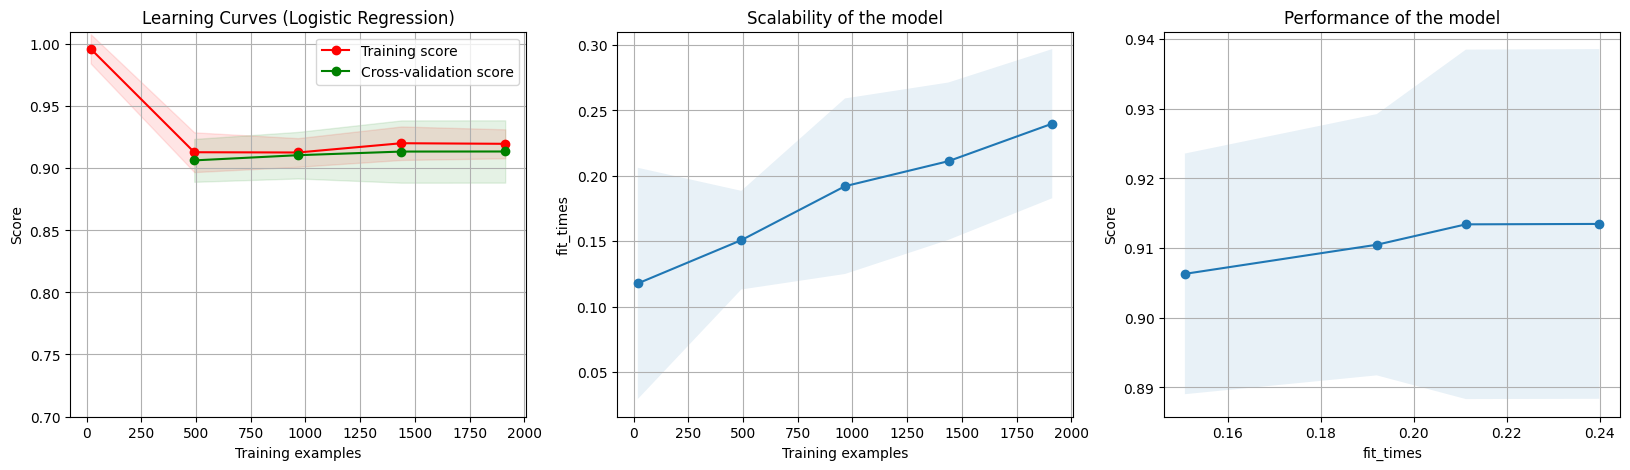

In [42]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

In [43]:
title1 = "Learning Curves (Gaussian Naive Bayes)"
cv1 =KFold(10,shuffle=True,random_state=28)
estimator1 = OneVsRestClassifier(GaussianNB())
train_sizes1, train_scores1, test_scores1,fit_times1= training(estimator1, X, Y, cv=cv1, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  19  492  966 1439 1913]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [44]:
train_scores_mean1 = train_scores1.mean(axis=1)
train_scores_std1 = train_scores1.std(axis=1)
    
test_scores_mean1 = test_scores1.mean(axis=1)
test_scores_std1= test_scores1.std(axis=1)
    
fit_times_mean1 = fit_times1.mean(axis=1)
fit_times_std1 = fit_times1.std(axis=1)

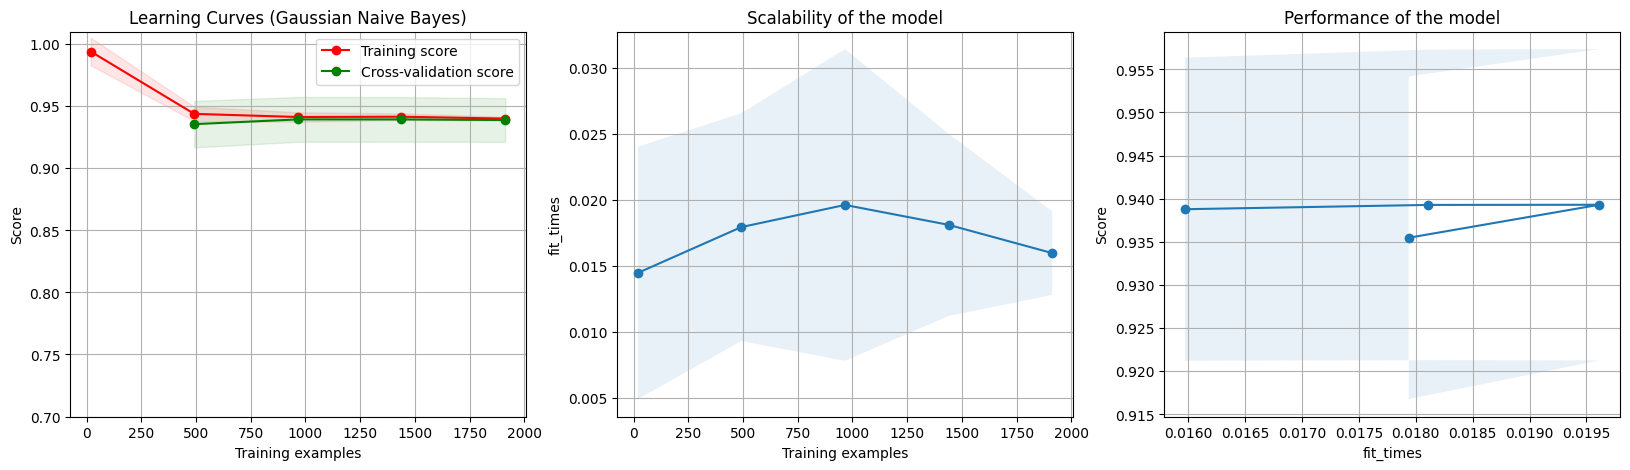

In [45]:
plot_training(train_sizes1,train_scores_mean1,train_scores_std1,test_scores_mean1,test_scores_std1,fit_times_mean1,fit_times_std1,title1,ylim=(0.7, 1.01))

In [46]:
title3 = "Learning Curves (NEURAL NETWORK)"
cv3 =KFold(10,shuffle=True,random_state=28)
estimator3 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(12,),
                                                 activation='relu',
                                                 solver='adam',
                                                 alpha = 0.0001,
                                                 batch_size= 'auto',
                                                 learning_rate= 'constant',
                                                 learning_rate_init= 0.001,
                                                 power_t= 0.5,
                                                 max_iter= 1000,
                                                 shuffle= True,
                                                 random_state= None,
                                                 tol= 0.0001,
                                                 verbose= True)
train_sizes3, train_scores3, test_scores3,fit_times3= training(estimator3, X, Y, cv=cv3, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  19  492  966 1439 1913]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Iteration 1, loss = 22.78602834
Iteration 2, loss = 21.20088470
Iteration 3, loss = 19.61982031
Iteration 4, loss = 18.10951254
Iteration 5, loss = 16.68227577
Iteration 6, loss = 15.26718589
Iteration 7, loss = 13.77664770
Iteration 8, loss = 12.26707467
Iteration 9, loss = 10.82951619
Iteration 10, loss = 9.51506587
Iteration 11, loss = 8.39742647
Iteration 12, loss = 7.46039937
Iteration 13, loss = 6.63126946
Iteration 14, loss = 5.86564600
Iteration 15, loss = 5.16042687
Iteration 16, loss = 4.57370901
Iteration 17, loss = 4.15438228
Iteration 18, loss = 3.85849104
Iteration 19, loss = 3.62342896
Iteration 20, loss = 3.43025923
Iteration 21, loss = 3.23836363
Iteration 22, loss = 3.04596274
Iteration 23, loss = 2.90748619
Iteration 24, loss = 2.84304410
Iteration 25, loss = 2.83880266
Iteration 26, loss = 2.85829894
Iteration 27, loss = 2.92021561
Iteration 28, loss = 2.98112099
Iteration 29, loss = 3.01221701
Iteration 30, loss = 3.01636590
Iteration 31, loss = 2.99646275
Iteratio

/home/laureoby/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/laureoby/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/laureoby/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/laureoby/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
  File "/home/laureoby/.local/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/home/laureoby/.local/lib/python3.8/site-packages/sklearn/

Iteration 1, loss = 33.03563279
Iteration 2, loss = 32.86193888
Iteration 3, loss = 32.49564069
Iteration 4, loss = 31.97875429
Iteration 5, loss = 30.33825079
Iteration 6, loss = 25.85660099
Iteration 7, loss = 16.56463181
Iteration 8, loss = 8.11463630
Iteration 9, loss = 5.68400397
Iteration 10, loss = 6.05360839
Iteration 11, loss = 5.99990811
Iteration 12, loss = 5.54997943
Iteration 13, loss = 4.93770448
Iteration 14, loss = 4.13856220
Iteration 15, loss = 3.26538709
Iteration 16, loss = 2.48881173
Iteration 17, loss = 2.19297739
Iteration 18, loss = 2.25013058
Iteration 19, loss = 2.19979690
Iteration 20, loss = 2.06304946
Iteration 21, loss = 1.99913632
Iteration 22, loss = 1.96644347
Iteration 23, loss = 1.91808335
Iteration 24, loss = 1.86418745
Iteration 25, loss = 1.81629230
Iteration 26, loss = 1.77845647
Iteration 27, loss = 1.73688378
Iteration 28, loss = 1.69071982
Iteration 29, loss = 1.65039546
Iteration 30, loss = 1.60535322
Iteration 31, loss = 1.56325949
Iteration 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.3s finished


In [47]:
train_scores_mean3 = train_scores3.mean(axis=1)
train_scores_std3 = train_scores3.std(axis=1)
    
test_scores_mean3 = test_scores3.mean(axis=1)
test_scores_std3= test_scores3.std(axis=1)
    
fit_times_mean3 = fit_times3.mean(axis=1)
fit_times_std3 = fit_times3.std(axis=1)

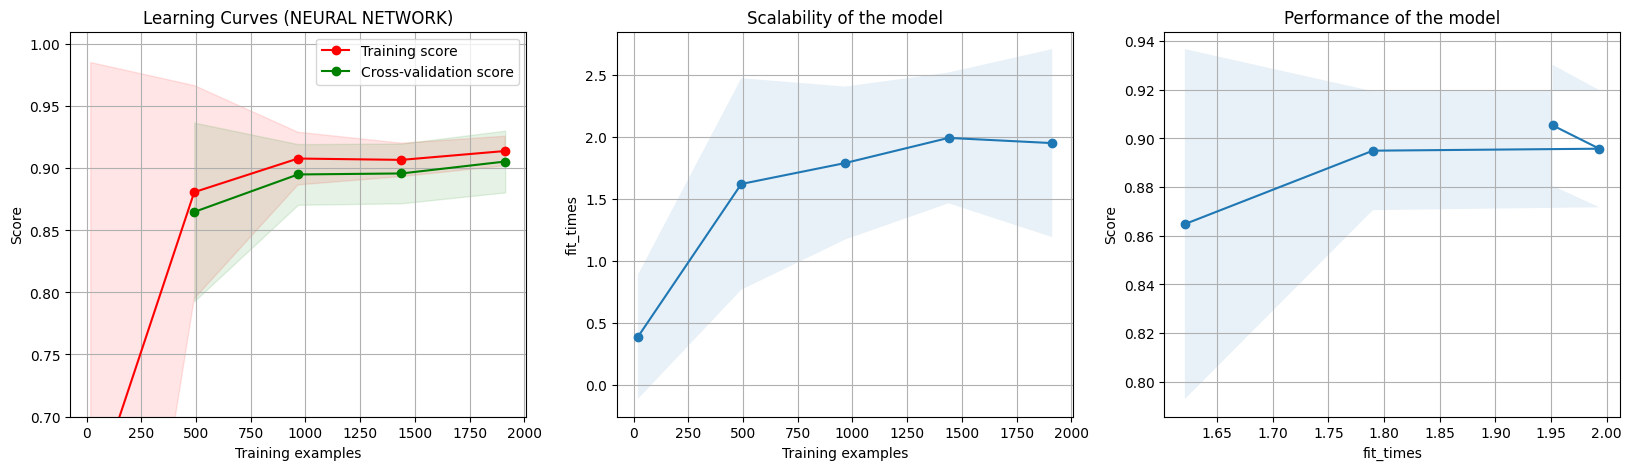

In [48]:
plot_training(train_sizes3,train_scores_mean3,train_scores_std3,test_scores_mean3,test_scores_std3,fit_times_mean3,fit_times_std3,title3,ylim=(0.7, 1.01))